lr.coef_:  [34.34952267]
lr.intercept_:  -0.24952623020530318
mse:  115.39176658090393
r2:  0.9105829510663599
test_score:  0.9105829510663599
train_score:  0.9134703923332052


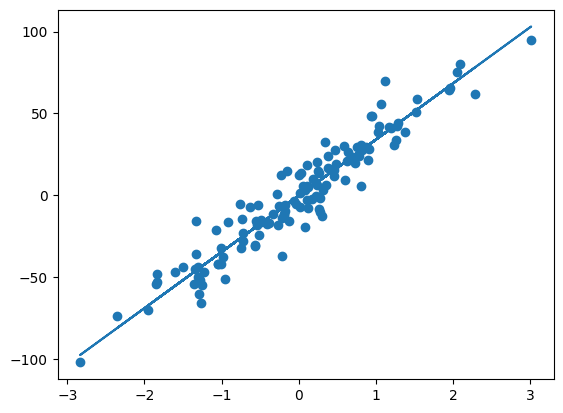

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification,make_regression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error,r2_score

X, y = make_regression(
    n_samples=500, n_features=1, n_informative=1, noise=10
)
# X.shape,y.shape
X_train,X_test,y_train,y_test=tts(X,y)


import matplotlib.pyplot as plt
# plt.scatter(X,y)
lr=LinearRegression()
lr.fit(X_train,y_train)
# lr.coef_,lr.intercept_
print('lr.coef_: ', lr.coef_)
print('lr.intercept_: ', lr.intercept_)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('mse: ', mse)
r2=r2_score(y_test,y_pred)
print('r2: ', r2)
test_score=lr.score(X_test,y_test)
print('test_score: ', test_score)
train_score=lr.score(X_train,y_train)
print('train_score: ', train_score)
# y_pred
#绘制散点图和拟合直线
# plt.plot(X_test,y_pred)
# plt.scatter(X_test,y_pred)
plt.plot(X_test,y_pred)
plt.scatter(X_test,y_test)


In [35]:
from sklearn.datasets import load_diabetes
import numpy as np
X,y=load_diabetes(return_X_y=True)

X=X[:,np.newaxis,2]
#利用np.newaxis,2 将10维特征向量的第2维打包一层,相当于插入了一个轴,该轴上的维数是1
# X.shape(442,1)
X_train,X_test,y_train,y_test=tts(X,y,test_size=20,shuffle=False)


{'label': 'rd'}
train_score:  0.24750834362604135
test_score:  0.2539535778937363


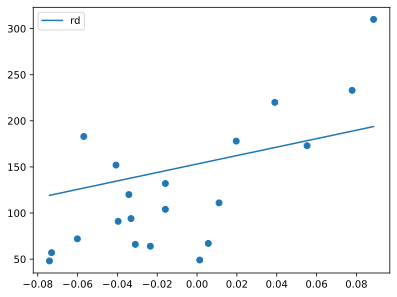

In [59]:
from sklearn.linear_model import Ridge,LinearRegression
rd=Ridge()

def linear_score_plot(model,**kwargs):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    print(kwargs)
    print('train_score: ', train_score)
    print('test_score: ', test_score)
    # 控制使用高清格式(svg)
    from matplotlib_inline import backend_inline
    backend_inline.set_matplotlib_formats('svg')
    plt.plot(X_test,y_pred,**kwargs)
    # plt.scatter(X_test,y_test)

def plot_dataset_points():
    plt.scatter(X_test,y_test,label='dataset points')

linear_score_plot(rd,label='rd')
plt.legend()
plot_dataset_points()

{'linewidth': 3, 'linestyle': ':', 'label': 'lr'}
train_score:  0.3351312506867541
test_score:  0.47257544798227147
{'label': 'rd0_1'}
train_score:  0.3321241551516456
test_score:  0.4480436728106735
{'label': 'rd1'}
train_score:  0.24750834362604135
test_score:  0.2539535778937363
{'label': 'rd10'}
train_score:  0.055918048135937704
test_score:  -0.06595360252642313


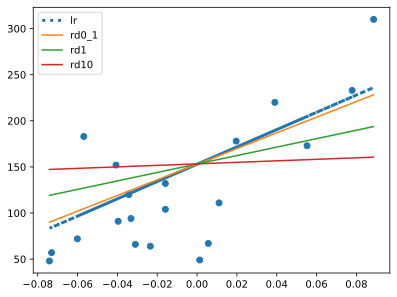

In [69]:
lr=LinearRegression()
linear_score_plot(lr,linewidth=3,linestyle=':',label='lr')
ridge0_1 = Ridge(alpha=0.1) 
linear_score_plot(ridge0_1,label='rd0_1')
ridge=Ridge(alpha=1) 
linear_score_plot(ridge,label='rd1')
ridge10=Ridge(alpha=10) 
linear_score_plot(ridge10,label='rd10')
plt.legend()
plot_dataset_points()
 

In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np
X,y=load_diabetes(return_X_y=True)
X,y=make_classification(n_samples=500,n_features=10,n_informative=5)
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.25,shuffle=False)

ridges=[ridge0_1,ridge,ridge10]
for r in ridges:
    r.fit(X_train, y_train) 
    print(r.coef_)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1") 
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10") 
plt.plot(ridge0_1.coef_, 'v', label="Ridge alpha=0.1") 
 
plt.plot(lr.coef_, 'o', label="LinearRegression") 

plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
# 水平线
plt.hlines(0, 0, len(lr.coef_)) 
plt.ylim(-25, 25) 
plt.legend() 

In [99]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# 加载波士顿房价数据集，并将其分为训练集和测试集
diabetes= load_diabetes()
db=diabetes
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target, test_size=0.2, random_state=42)

# 创建一个固定正则化系数的Ridge模型，并训练和测试模型
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
score = ridge.score(X_test, y_test)
print("固定正则化系数的Ridge模型得分为：", score)

# 创建一个交叉验证选择正则化系数的RidgeCV模型，并训练和测试模型
ridgecv = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridgecv.fit(X_train, y_train)

score_cv = ridgecv.score(X_test, y_test)
print("交叉验证选择正则化系数的RidgeCV模型得分为：", score_cv)
print("交叉验证选择的最优正则化系数为：", ridgecv.alpha_)

固定正则化系数的Ridge模型得分为： 0.4493973121295206
交叉验证选择正则化系数的RidgeCV模型得分为： 0.46085219464119187
交叉验证选择的最优正则化系数为： 0.1


In [100]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV, LassoCV

#第一层堆叠器
# 个体学习器rfr,gbr(# (都是集成学习器,指定较多超参数))
final_layer_rfr = RandomForestRegressor(
    n_estimators=10, max_features=1, max_leaf_nodes=5, random_state=42
)
final_layer_gbr = GradientBoostingRegressor(
    n_estimators=10, max_features=1, max_leaf_nodes=5, random_state=42
)

# 第一层元学习器使用Ridge,并将第一层个体学习器共同打包为第一层堆叠器
final_layer = StackingRegressor(
    estimators=[("rf", final_layer_rfr), ("gbrt", final_layer_gbr)],
    final_estimator=RidgeCV(),
)
#构建第二层堆叠器
# 个体学习器(使用默认参数,书写更具紧凑和简洁),次级学习器使用第一层堆叠器
multi_layer_regressor = StackingRegressor(
    estimators=[
        ("ridge", RidgeCV()),
        ("lasso", LassoCV(random_state=42)),
        ("knr", KNeighborsRegressor(n_neighbors=20, metric="euclidean")),
    ],
    final_estimator=final_layer,
)
# 训练这个多层堆叠回归器
multi_layer_regressor.fit(X_train, y_train)
# 评估分数
print("R2 score: {:.2f}".format(multi_layer_regressor.score(X_test, y_test)))

R2 score: 0.53


In [136]:
from sklearn.datasets import load_iris,load_digits
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = load_iris(return_X_y=True)
# X,y=load_digits(return_X_y=True)

random_state = 42
estimators = [
    ("rf", RandomForestClassifier(n_estimators=10,max_depth=3, random_state=random_state)),
    ("adab", AdaBoostClassifier(n_estimators=10,learning_rate=0.1,random_state=random_state)),
    # ("svr", make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))),
    # ("rdcv", RidgeClassifierCV()),
    # ("dt", DecisionTreeClassifier(random_state=random_state)),
]
# 准备需要粗略比较的分类器
stack = StackingClassifier(estimators=estimators, final_estimator=SVC())

rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
lsvc = LinearSVC(max_iter=5000, random_state=random_state)
svc = SVC()
mlp = MLPClassifier(max_iter=3000)
rdcv = RidgeClassifierCV()
gnb=GaussianNB()
plsvc = make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
# 多层堆叠

##定义最后一层
stack_final_layer = StackingClassifier(
    estimators=[("gbc", GradientBoostingClassifier()), ("svc", SVC())],
    final_estimator=LogisticRegression(),
)
stack1 = StackingClassifier(
    estimators=[("gbc", GaussianNB())],
    final_estimator=LogisticRegression(),
)
##堆叠二层(容易过拟合)
stack_multilayer=StackingClassifier(
    estimators=estimators, 
    final_estimator=stack_final_layer
)

#配置待评估的分类器的列表
clfs = [stack,
        stack1,
        # stack_multilayer,
        gnb,rfc, rdcv, dt, lsvc, svc, mlp, plsvc]

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=random_state
)


def checkout_clfs(clfs):
    for clf in clfs:
        print(clf)
        # print(clf.__class__.__name__)
        clf.fit(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        train_score = clf.score(X_train, y_train)
        print("train_score:", train_score)
        print("test_score:", test_score)
        print()


checkout_clfs(clfs)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=3,
                                                       n_estimators=10,
                                                       random_state=42)),
                               ('adab',
                                AdaBoostClassifier(learning_rate=0.1,
                                                   n_estimators=10,
                                                   random_state=42))],
                   final_estimator=SVC())
train_score: 0.9821428571428571
test_score: 0.9473684210526315

StackingClassifier(estimators=[('gbc', GaussianNB())],
                   final_estimator=LogisticRegression())
train_score: 0.9732142857142857
test_score: 0.9210526315789473

GaussianNB()
train_score: 0.9732142857142857
test_score: 0.9210526315789473

RandomForestClassifier()
train_score: 1.0
test_score: 0.9210526315789473

RidgeClassifierCV()
train_score: 0.8839285714285714
test_score: 0.

In [121]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集，并将其分为训练集和测试集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 创建一个高斯朴素贝叶斯分类器，并训练模型
gnb = GaussianNB()
clf=gnb

clf.fit(X_train, y_train)

# 使用训练好的模型进行预测
y_pred = clf.predict(X_test)

#计算模型的准确率
accuracy = accuracy_score(y_test, y_pred)
print("预测准确率为：", accuracy)
checkout_clfs(X=X_train,y=y)

预测准确率为： 1.0
